<a href="https://colab.research.google.com/github/CFF-Stack/IMT-542-I3/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
#nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download("stopwords")
#nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

stop_words = set(stopwords.words("english"))

from collections import Counter

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
# Use beautfulsoup to get and parse webpage
url = "https://swine.extension.org/is-it-true-that-pigs-do-not-have-sweat-glands-and-therefore-are-not-able-to-get-rid-of-toxins-in-their-bodies-i-e-making-the-pork-meat-unhealthy-to-eat/#:~:text=Pigs%20do%20not%20sweat%20but,kept%20in%20climate%20controlled%20facilities."
page = urlopen(url)
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

page = dict()
page['title']=soup.title.text
page

{'title': 'Is it true that pigs do not have sweat glands and, therefore, are not able to get rid of toxins in their bodies? i.e. making the pork meat unhealthy to eat. – Hogs, Pigs, and Pork'}

In [ ]:
# Look at HTML structure to get articles
articles = soup.find_all("article")
sections = []
for i,a in enumerate(articles):
  divTag = a.find_all("div")
  for tag in divTag:
    for element in tag.find_all("p"):
      sections.append(element.text)
page['sections']=sections

print(page['title'])
print(' '.join(page['sections']))



Is it true that pigs do not have sweat glands and, therefore, are not able to get rid of toxins in their bodies? i.e. making the pork meat unhealthy to eat. – Hogs, Pigs, and Pork
Pigs do not sweat but they are able to rid themselves of heat in other ways such as via their skin and through respiration. Because an animal does not sweat does not mean toxins build up in the body. Most pigs are fed highly balanced, nutritionally fortified diets and are kept in climate controlled facilities.  They do not have access to anything that could be considered toxins. Even if they were able to get into toxins, the body rids them just as we do.  Whenever we sweat, we do not think of that as our mechanism for ridding our body of toxins.  Pigs have a metabolism very similar to ours and, thus, can cleanse themselves internally so to speak as we do.  Pork is wholesome and you can be assured that it does not contain some mythical buildup of toxins.  You can go ahead and enjoy that next great pork meal wi

In [ ]:
# use NLP functions to count words and parts of speech

sentences = sent_tokenize(' '.join(page['sections']))

filtered_words = []
filtered_words_pos = []
for sent in sentences:
  tokens = word_tokenize(sent)
  tokens_pos = nltk.pos_tag(tokens)
  print(tokens_pos)
  for tok in tokens_pos:
    if tok[0].casefold() not in stop_words:
        filtered_words.append(tok[0].lower())
        filtered_words_pos.append(tok[1])

print(Counter(filtered_words).most_common(5))
print(Counter(filtered_words_pos).most_common(5))



[('Pigs', 'NNS'), ('do', 'VBP'), ('not', 'RB'), ('sweat', 'VB'), ('but', 'CC'), ('they', 'PRP'), ('are', 'VBP'), ('able', 'JJ'), ('to', 'TO'), ('rid', 'VB'), ('themselves', 'PRP'), ('of', 'IN'), ('heat', 'NN'), ('in', 'IN'), ('other', 'JJ'), ('ways', 'NNS'), ('such', 'JJ'), ('as', 'IN'), ('via', 'IN'), ('their', 'PRP$'), ('skin', 'NN'), ('and', 'CC'), ('through', 'IN'), ('respiration', 'NN'), ('.', '.')]
[('Because', 'IN'), ('an', 'DT'), ('animal', 'NN'), ('does', 'VBZ'), ('not', 'RB'), ('sweat', 'VB'), ('does', 'VBZ'), ('not', 'RB'), ('mean', 'VB'), ('toxins', 'NNS'), ('build', 'VB'), ('up', 'RP'), ('in', 'IN'), ('the', 'DT'), ('body', 'NN'), ('.', '.')]
[('Most', 'JJS'), ('pigs', 'NNS'), ('are', 'VBP'), ('fed', 'VBN'), ('highly', 'RB'), ('balanced', 'VBN'), (',', ','), ('nutritionally', 'RB'), ('fortified', 'VBN'), ('diets', 'NNS'), ('and', 'CC'), ('are', 'VBP'), ('kept', 'VBN'), ('in', 'IN'), ('climate', 'NN'), ('controlled', 'VBN'), ('facilities', 'NNS'), ('.', '.')]
[('They', 'PRP

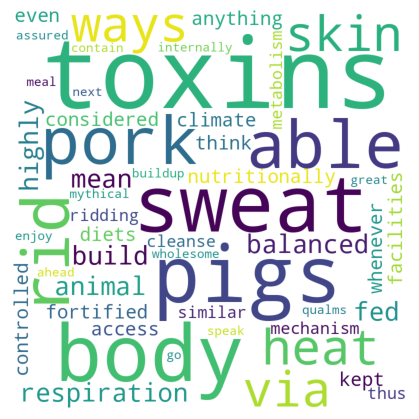

In [ ]:
# generate a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(filtered_words))

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# define a function to use an API to get text from scientific articles

import urllib
import requests

def find_abstracts(query,limit=5):

  encoded_query = urllib.parse.quote(query)
  url = 'https://api.semanticscholar.org/graph/v1/paper/search?query='+encoded_query+'&publicationTypes=JournalArticle&fields=url,abstract&limit='+str(limit)
  results = requests.get(url).json()

  if 'data' in results:
    abstracts = {}
    for res in results['data']:
      if res['abstract'] is not None:
        abstracts[res['paperId']]=res['abstract']
    return abstracts

  print('no abstracts found')
  return {}

In [ ]:
# write a function to create wordcloud image file

def generate_wordcloud(sentences,filename):
  filtered_words = []
  filtered_words_pos = []
  for sent in sentences:
    tokens = word_tokenize(sent)
    tokens_pos = nltk.pos_tag(tokens)
    for tok in tokens_pos:
      if tok[0].casefold() not in stop_words:
          filtered_words.append(tok[0].lower())
          filtered_words_pos.append(tok[1])

  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = None,
                  min_font_size = 10).generate(' '.join(filtered_words))

  plt.figure(figsize = (4, 4), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.savefig(str(filename)+'.png')

In [ ]:
# for a topic, get some abstracts
res = find_abstracts('3d print soft sensors')

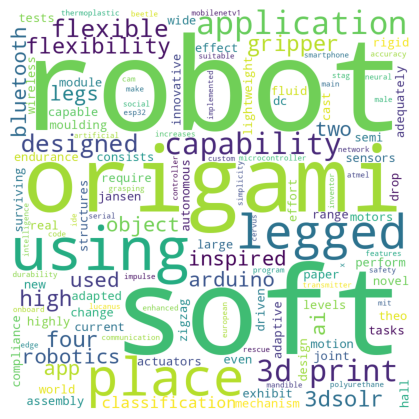

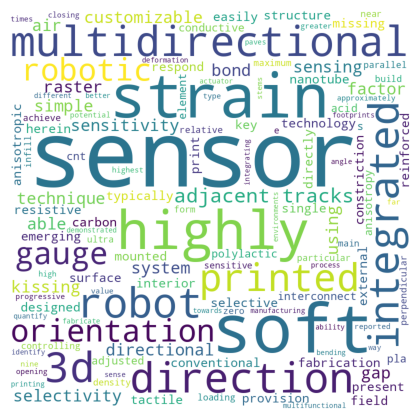

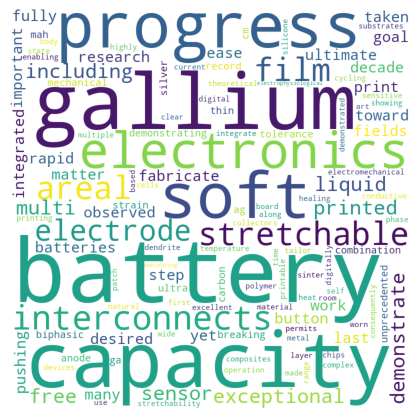

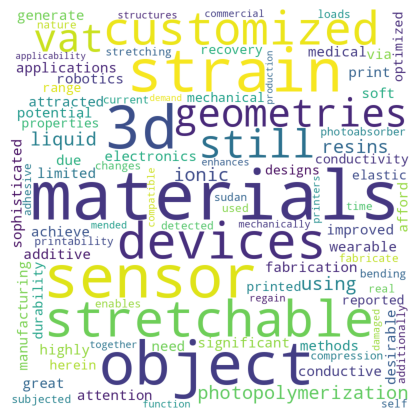

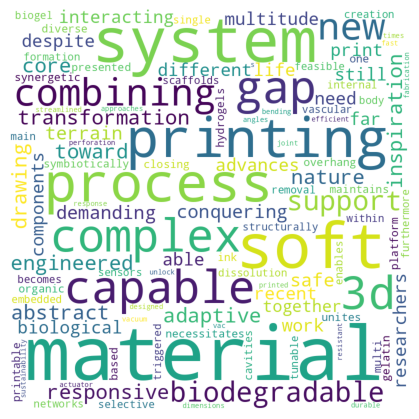

In [ ]:
# generate those wordcloud images
for i,article in enumerate(res):
  generate_wordcloud(sentences=sent_tokenize(res[article]),filename=i)